<a href="https://colab.research.google.com/github/AGADA-BI/Gold-price-prediction-model/blob/main/Gold_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets

df = '/content/drive/MyDrive/Gold price predictive model/Gold Futures Historical Data (2010-2024).csv'

gold_data = pd.read_csv(df)

In [ ]:
# Inspecting the dataset
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/30/2024,"2,493.80","2,519.50","2,525.40","2,498.80",0.21K,-1.26%
1,08/29/2024,"2,525.70","2,504.10","2,525.30","2,503.90",3.97K,0.99%
2,08/28/2024,"2,501.00","2,501.00","2,501.00","2,501.00",0.10K,-0.60%
3,08/27/2024,"2,516.00","2,515.20","2,523.10","2,506.90",0.10K,-0.07%
4,08/26/2024,"2,517.70","2,509.90","2,523.10","2,509.10",0.29K,0.37%


In [ ]:
gold_data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3732,3732,3732,3732,3732,3651,3732
unique,3732,2966,2956,2970,2959,367,532
top,08/30/2024,"1,273.70","1,273.50","1,247.00","1,218.60",0.01K,0.04%
freq,1,6,5,5,5,275,33


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3732 non-null   object
 1   Price     3732 non-null   object
 2   Open      3732 non-null   object
 3   High      3732 non-null   object
 4   Low       3732 non-null   object
 5   Vol.      3651 non-null   object
 6   Change %  3732 non-null   object
dtypes: object(7)
memory usage: 204.2+ KB


In [ ]:
# Feature engineering and transformation

## Convert date column from object to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

## Remove columns that are not needed
gold_data.drop(['Vol.', 'Change %'], axis=1, inplace=True)

## Arrange the dataset into ascending order by date
gold_data.sort_values(by='Date', ascending=True, inplace=True)

## Reset the index
df.reset_index(drop=True, inplace=True)


In [ ]:
gold_data.head()

## Reset the index
gold_data.reset_index(drop=True, inplace=True)
gold_data.head()

,Date,Price,Open,High,Low
0,2010-01-04,"1,117.70","1,097.10","1,122.30","1,097.10"
1,2010-01-05,"1,118.10","1,122.00","1,126.50","1,115.00"
2,2010-01-06,"1,135.90","1,120.70","1,139.20","1,120.70"
3,2010-01-07,"1,133.10","1,132.10","1,133.00","1,129.20"
4,2010-01-08,"1,138.20","1,124.90","1,136.90","1,122.70"


In [ ]:
# Iterate over columns and convert to string if not 'Date'
for column in gold_data.columns:
    if column != 'Date':
        gold_data[column] = gold_data[column].astype(str)
        # Remove commas if they exist
        gold_data[column] = gold_data[column].str.replace(',', '')

# Convert 'Price' to float
gold_data['Price'] = gold_data['Price'].astype(float)

gold_data.head(10)

,Date,Price,Open,High,Low
0,2010-01-04,1117.7,1097.10,1122.30,1097.10
1,2010-01-05,1118.1,1122.00,1126.50,1115.00
2,2010-01-06,1135.9,1120.70,1139.20,1120.70
3,2010-01-07,1133.1,1132.10,1133.00,1129.20
4,2010-01-08,1138.2,1124.90,1136.90,1122.70
5,2010-01-11,1150.7,1143.00,1161.20,1143.00
6,2010-01-12,1128.9,1155.00,1157.20,1127.20
7,2010-01-13,1136.4,1128.10,1136.40,1121.00
8,2010-01-14,1142.6,1137.00,1145.90,1132.80
9,2010-01-15,1130.1,1132.80,1133.40,1127.20


In [ ]:
gold_data.isnull()

,Date,Price,Open,High,Low
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3727,False,False,False,False,False
3728,False,False,False,False,False
3729,False,False,False,False,False
3730,False,False,False,False,False


In [ ]:
gold_data.head(50)

,Date,Price,Open,High,Low
0,2010-01-04,1117.7,1097.10,1122.30,1097.10
1,2010-01-05,1118.1,1122.00,1126.50,1115.00
2,2010-01-06,1135.9,1120.70,1139.20,1120.70
3,2010-01-07,1133.1,1132.10,1133.00,1129.20
4,2010-01-08,1138.2,1124.90,1136.90,1122.70
5,2010-01-11,1150.7,1143.00,1161.20,1143.00
6,2010-01-12,1128.9,1155.00,1157.20,1127.20
7,2010-01-13,1136.4,1128.10,1136.40,1121.00
8,2010-01-14,1142.6,1137.00,1145.90,1132.80
9,2010-01-15,1130.1,1132.80,1133.40,1127.20


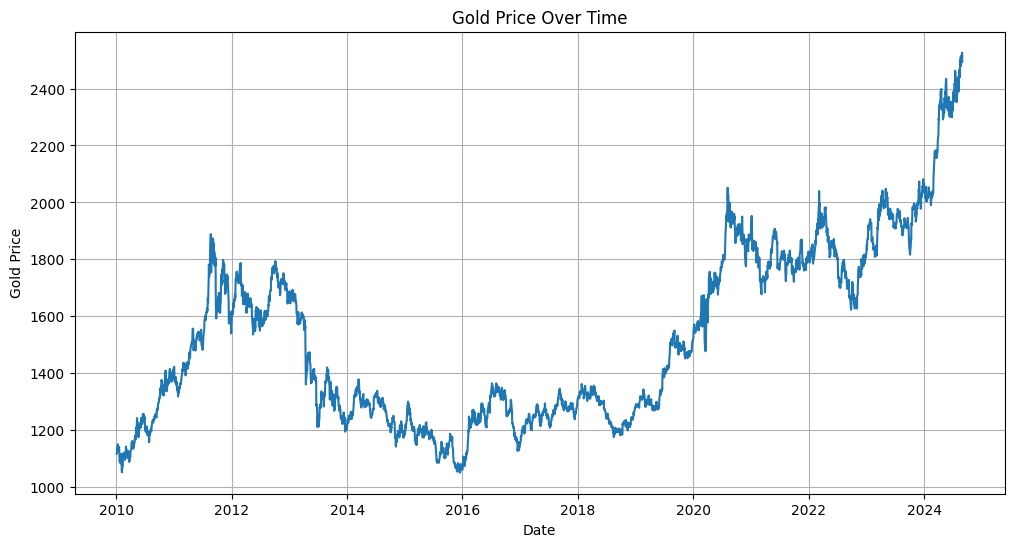

In [ ]:
## Visualization of gold price overtime

plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['Price'])
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Train-Test Split for Time Series Data

train_size = int(len(gold_data) * 0.8)
train_data = gold_data[:train_size]
test_data = gold_data[train_size:]

In [ ]:
test_data.tail()

,Date,Price,Open,High,Low
3727,2024-08-26,2517.7,2509.90,2523.10,2509.10
3728,2024-08-27,2516.0,2515.20,2523.10,2506.90
3729,2024-08-28,2501.0,2501.00,2501.00,2501.00
3730,2024-08-29,2525.7,2504.10,2525.30,2503.90
3731,2024-08-30,2493.8,2519.50,2525.40,2498.80
